In [225]:
import pandas as pd
import numpy as np
import matplotlib
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

df = pd.read_csv("train.csv")

# Remove `Id` feature
df = df.drop('Id', 1)

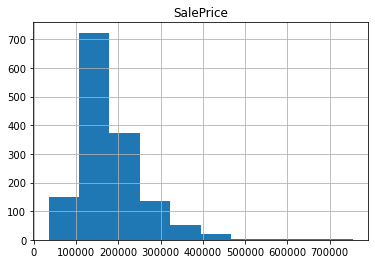

In [159]:
# Show histogram for `SalePrice` in report
hist = df.hist('SalePrice')

<AxesSubplot:>

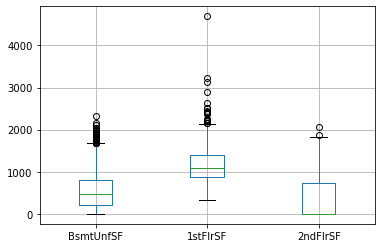

In [160]:
# Plot boxplot for three attributes
df.boxplot(column=['BsmtUnfSF', '1stFlrSF', '2ndFlrSF'])

In [271]:
num_df = df.drop(['SalePrice'], axis=1).select_dtypes(include=np.number)
num_cols = numeric_df.columns

for col in num_cols:
    # Clip outlier values into threshold values
    percentiles = df[col].quantile([0.01, 0.99]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])
    
    # Fill all NA with mean
    df[col] = df[col].fillna(df[col].mean())

In [272]:
# Min-max normalization before PCA
pipeline = Pipeline([('scaling', MinMaxScaler()), ('pca', PCA(n_components=19))])
X_train = pd.DataFrame(pipeline.fit_transform(num_df), index=num_df.index)

In [276]:
# Single-layer MLP
y_train = df['SalePrice']

clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=200, learning_rate_init=0.001).fit(X_train, y_train)

            0         1         2         3         4         5         6   \
0     0.709812 -0.337034 -0.555738  0.206288  0.072453  0.238910 -0.237143   
1    -0.182844  0.460811  0.288331  0.154270 -0.206776 -0.010879  0.474026   
2     0.788473 -0.298641 -0.303770  0.182603 -0.044109  0.053695  0.020498   
3    -0.249879 -0.079042  0.478667 -0.024556 -0.280064  0.243309 -0.017071   
4     1.260963 -0.178880  0.093194  0.182517 -0.029214  0.161483 -0.055788   
...        ...       ...       ...       ...       ...       ...       ...   
1455  0.620386 -0.476191 -0.233765 -0.352771 -0.228560 -0.201725  0.045445   
1456  0.270017  0.802256  0.510057  0.406962  0.671797 -0.126137  0.161788   
1457  0.118121 -0.212737  0.684088 -0.246501  0.814224  0.191884  0.930675   
1458 -0.765337  0.231026 -0.242111  0.336505  0.598110 -0.083142  0.348415   
1459 -0.127866 -0.270630 -0.175589  0.775994 -0.047977 -0.242691 -0.196912   

            7         8         9         10        11        1

In [277]:
# Cross validation
scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 326, in _fit
    X, y = self._validate_input(X, y, incremental)
  File "/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 971, in _validate_input
    self._label_binarizer.fit(y)
  File "

In [163]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil